# Практика по базовой математической статистике для Data scientist

# Практика 2 - поиск взаимоосвязей в данных

На практическом занятии научимся находять линейные связи между признаками при помощи python на датасете boston house prices

- анализ корреляций в датасете при помощи pandas
- визуализируем heatmap связей при помощи seaborn

Для начала импортируем все полезные библитеки и настроим ноутбук

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.special as sps
import warnings
from sklearn.datasets import load_boston

%matplotlib inline
plt.rcParams["figure.figsize"] = (10.0, 7.0)
warnings.filterwarnings("ignore")

In [3]:
# Загрузим датасет
boston = load_boston()

In [4]:
# Посмотрим его описание
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
# Загрузим фичи для анализа
df = pd.DataFrame(boston.data,columns = boston.feature_names)

In [6]:
# Добавим целевую переменную - цены на недвижимость
df["price"] = boston.target

In [7]:
# Переведем загловки столбцов в нижний регистр и посмотрим на данные
df.columns = map(str.lower, df.columns)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
# Посмотрим на типы переменных и количество данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    float64
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    float64
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Теперь мы готовы к исследованию взаимосвязей. Выберем факторы, которые хочется поисследовать из списка:

In [9]:
research_list = ["crim", "zn", "indus", "nox", "rm", "age", "dis", "rad", "lstat", "price"]

In [10]:
# Остсортируем только интересные нам колонки
df[research_list].head()

,crim,zn,indus,nox,rm,age,dis,rad,lstat,price
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,5.33,36.2


Постром матрицу парных корреляций для отобранных данных при помощи метода corr() pandas
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

In [11]:
corr_m = df[research_list].corr()

In [12]:
corr_m

,crim,zn,indus,nox,rm,age,dis,rad,lstat,price
crim,1.000000,-0.200469,0.406583,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.603800,-0.483725
nox,0.420972,-0.516604,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.488676,-0.381626
lstat,0.455621,-0.412995,0.603800,0.590879,-0.613808,0.602339,-0.496996,0.488676,1.000000,-0.737663
price,-0.388305,0.360445,-0.483725,-0.427321,0.695360,-0.376955,0.249929,-0.381626,-0.737663,1.000000


Теперь визуализируем полученную матрицу при помощи seaborn heatmap https://seaborn.pydata.org/generated/seaborn.heatmap.html

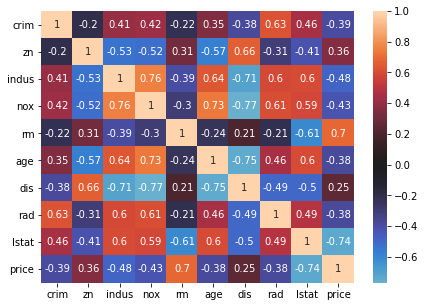

In [13]:
plt.figure(figsize=(7,5))
sns.heatmap(corr_m, center=0, annot=True)

Видно, что есть сильные обратные и прямые связи. А теперь построим диаграмму рассеяния для каждой пары признаков со связями заметной значимости c показателем price. 
Заметная значимость по шкале Чеддока - при коэффициенте корреляции от 0.5 по модулю и выше.

Коэффициент корреляции 0.6953599470715393


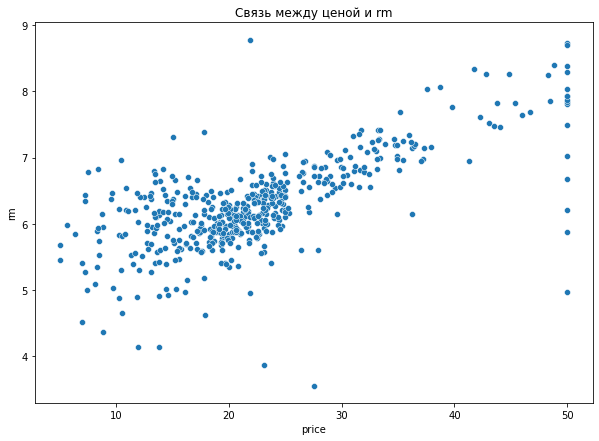

Коэффициент корреляции -0.737662726174015


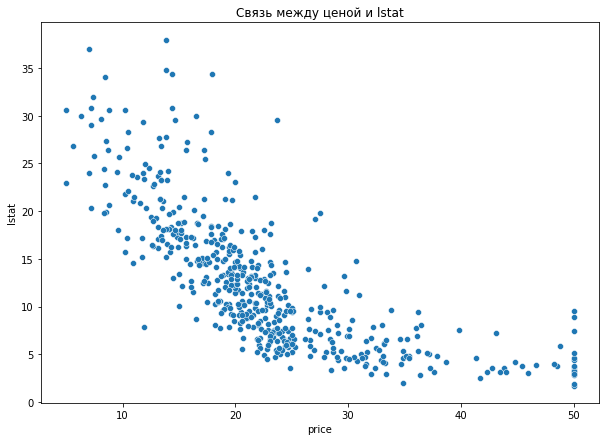

In [14]:
level = 0.5
for i in research_list[:-1]:
    curr_corr = df[i].corr(df.price)
    if abs(curr_corr) >= level:
        sns.scatterplot(x="price", y=i, data=df)
        print("Коэффициент корреляции " + str(curr_corr))
        plt.title("Связь между ценой и "+str(i))
        plt.show()

Как можем видеть, цена на дома прямо связана с количеством комнат и обратно пропорциональна доле населения с низкими доходами.

## Мини домашка

Постройте диаграмму рассеяния для каждой пары признаков со связями умеренной значимости с показателем price.
Умеренная связь по шкале Чеддока - коэффициент корреляции от 0.3 по модулю

Коэффициент корреляции -0.38830460858681165


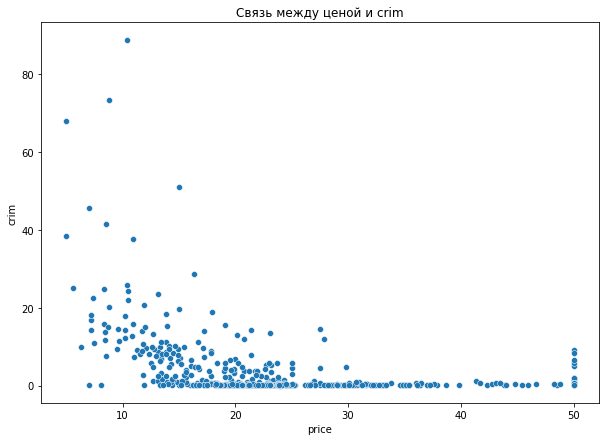

Коэффициент корреляции 0.36044534245054305


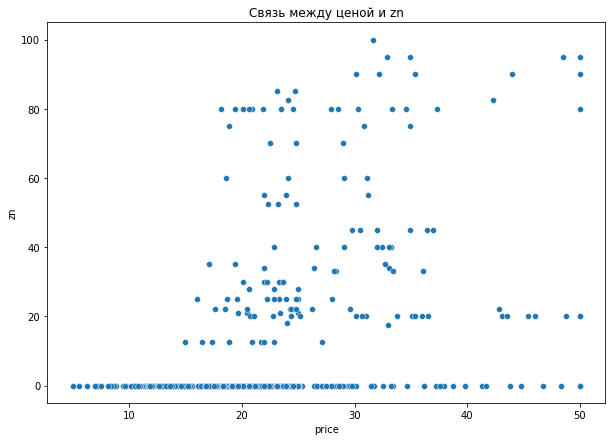

Коэффициент корреляции -0.4837251600283728


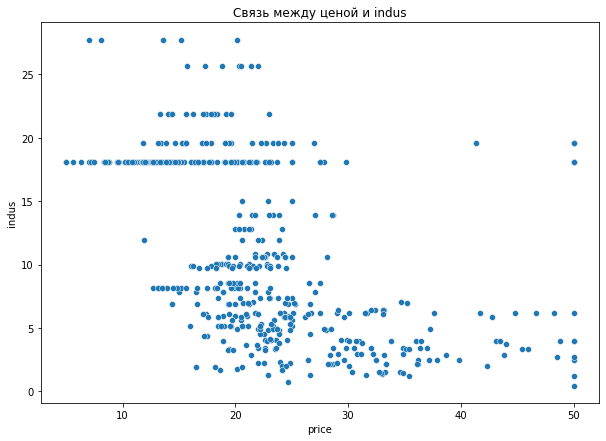

Коэффициент корреляции -0.42732077237328264


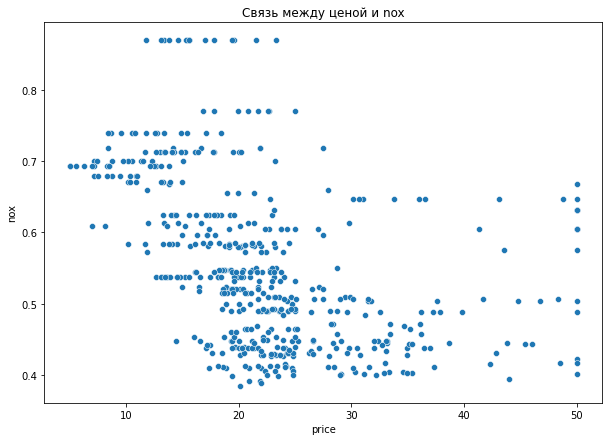

Коэффициент корреляции 0.6953599470715393


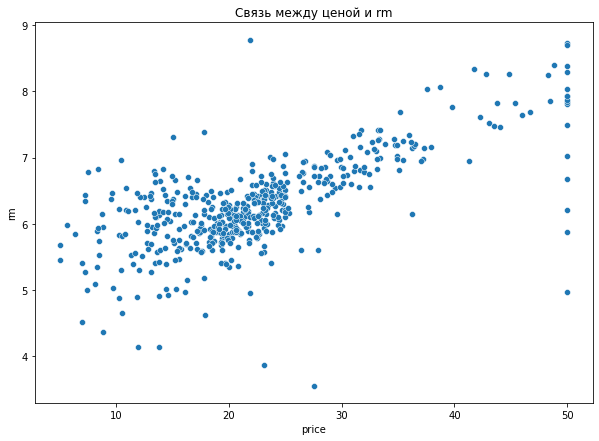

Коэффициент корреляции -0.3769545650045963


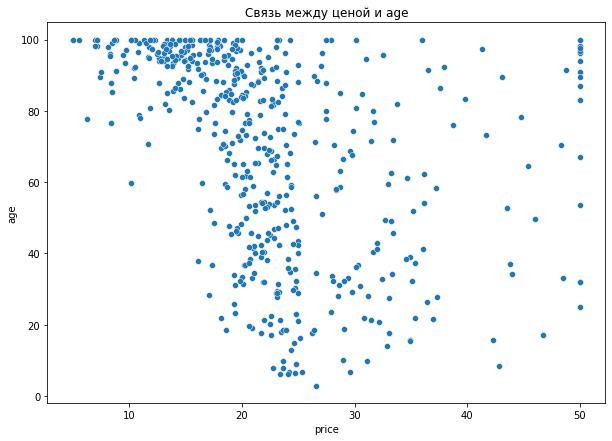

Коэффициент корреляции -0.3816262306397781


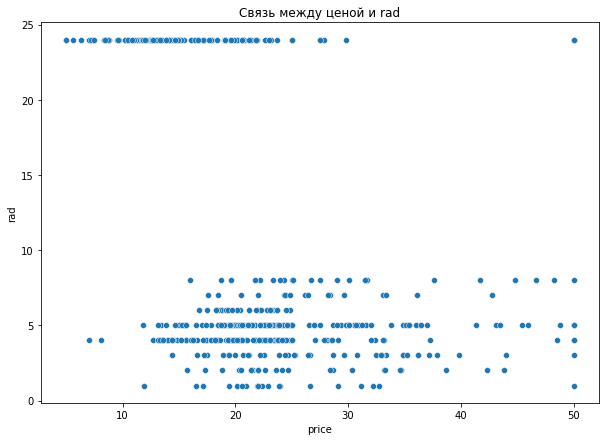

Коэффициент корреляции -0.737662726174015


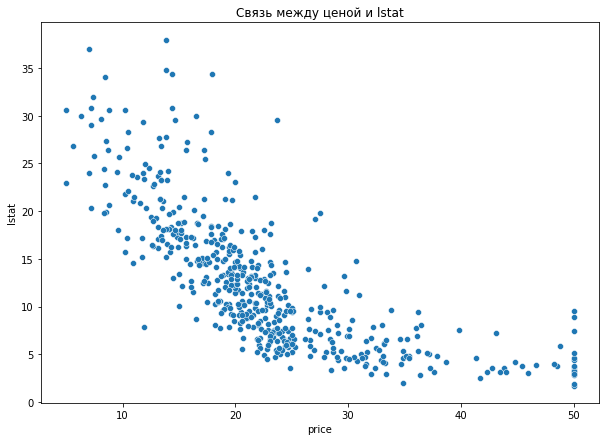

In [15]:
level = 0.3
for i in research_list[:-1]:
    curr_corr = df[i].corr(df.price)
    if abs(curr_corr) >= level:
        sns.scatterplot(x="price", y=i, data=df)
        print("Коэффициент корреляции " + str(curr_corr))
        plt.title("Связь между ценой и "+str(i))
        plt.show()